In [3]:
from PIL.ImageOps import grayscale

import corr
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt


import os
#os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

device = 'cuda'

In [4]:
frames = corr.load_example_experiment()
#frames = corr.denoise_stack(frames)
#frames = np.array([corr.uint8_to_float32(frame) for frame in frames])
video = (torch.tensor(np.array(frames)).to(device)
         .unsqueeze(0).unsqueeze(2).repeat(1,1,3,1,1).float() * 255.0)
#convert to  # B T C H W format with "fake" rgb

In [5]:
cotracker = (torch.hub.load("facebookresearch/co-tracker", "cotracker3_online").to
             (device))
cotracker(video_chunk=video, is_first_step=True, grid_size=10)

for idx in range(0, video.shape[1] - cotracker.step, cotracker.step):
    pred_tracks, pred_visibility = cotracker(video_chunk=video[:,
                                                         idx:idx + cotracker.step*2])

Using cache found in C:\Users\morit/.cache\torch\hub\facebookresearch_co-tracker_main


In [6]:
video[0,0]

tensor([[[ 0.2529,  0.1829,  1.7432,  ...,  0.2179,  0.2374,  0.8794],
         [ 0.2101,  0.2335,  0.4047,  ...,  0.1790,  0.2101,  0.1673],
         [ 3.0778,  0.2023,  0.2529,  ...,  0.1595,  0.2296,  0.2062],
         ...,
         [ 4.2101,  0.2296,  2.8405,  ...,  0.1984,  0.2023,  0.7160],
         [ 7.1751,  3.1829,  3.7860,  ...,  0.1984,  4.7821, 13.0545],
         [ 0.2335,  0.1673,  2.1128,  ...,  5.5564, 10.6226,  9.8249]],

        [[ 0.2529,  0.1829,  1.7432,  ...,  0.2179,  0.2374,  0.8794],
         [ 0.2101,  0.2335,  0.4047,  ...,  0.1790,  0.2101,  0.1673],
         [ 3.0778,  0.2023,  0.2529,  ...,  0.1595,  0.2296,  0.2062],
         ...,
         [ 4.2101,  0.2296,  2.8405,  ...,  0.1984,  0.2023,  0.7160],
         [ 7.1751,  3.1829,  3.7860,  ...,  0.1984,  4.7821, 13.0545],
         [ 0.2335,  0.1673,  2.1128,  ...,  5.5564, 10.6226,  9.8249]],

        [[ 0.2529,  0.1829,  1.7432,  ...,  0.2179,  0.2374,  0.8794],
         [ 0.2101,  0.2335,  0.4047,  ...,  0

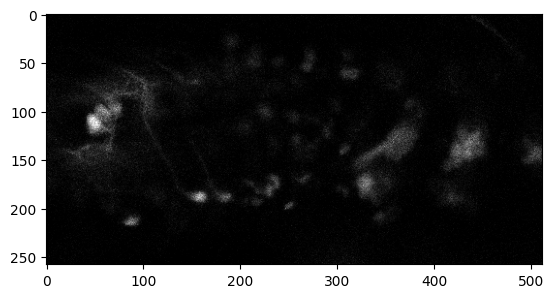

In [7]:
plt.imshow(video[0,0].permute(1,2,0).cpu() / 255.0)
plt.show()

In [8]:
test_frame = frames[0]
print(test_frame.dtype)
test_frame = corr.float32_to_uint8(test_frame)
print(test_frame.dtype)

float32
uint8


In [9]:
img = Image.fromarray(test_frame)
print(img.format)
img.show()

None


In [10]:
from cotracker.utils.visualizer import Visualizer
vis = Visualizer(save_dir="./saved_videos")

In [11]:
result = vis.visualize(video, pred_tracks)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (512, 258) to (512, 272) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video saved to ./saved_videos\video.mp4


In [13]:
import gc

torch.cuda.empty_cache()
del frames
del video

del cotracker
del vis
#del pred_tracks, pred_visibility
gc.collect()


0